In [815]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [816]:
estate_data = pd.read_csv("Real estate.csv",index_col="No")

estate_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [817]:
estate_data["Y house price of unit area"].sort_values(ascending=False)

No
271    117.5
221     78.3
313     78.0
167     73.6
106     71.0
       ...  
227     12.8
117     12.2
163     11.6
348     11.2
114      7.6
Name: Y house price of unit area, Length: 414, dtype: float64

In [818]:
#estate_data["X5 latitude"].sort_values(ascending=False)

In [819]:
estate_data.drop([271],inplace=True)

In [820]:
estate_data["Y house price of unit area"].sort_values(ascending=False)

No
221    78.3
313    78.0
167    73.6
106    71.0
17     70.1
       ... 
331    12.8
117    12.2
163    11.6
348    11.2
114     7.6
Name: Y house price of unit area, Length: 413, dtype: float64

In [821]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     413 non-null    float64
 1   X2 house age                            413 non-null    float64
 2   X3 distance to the nearest MRT station  413 non-null    float64
 3   X4 number of convenience stores         413 non-null    int64  
 4   X5 latitude                             413 non-null    float64
 5   X6 longitude                            413 non-null    float64
 6   Y house price of unit area              413 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.8 KB


In [822]:
X = estate_data.drop(["Y house price of unit area","X1 transaction date", "X2 house age", "X4 number of convenience stores"], axis= 1)

y = estate_data["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

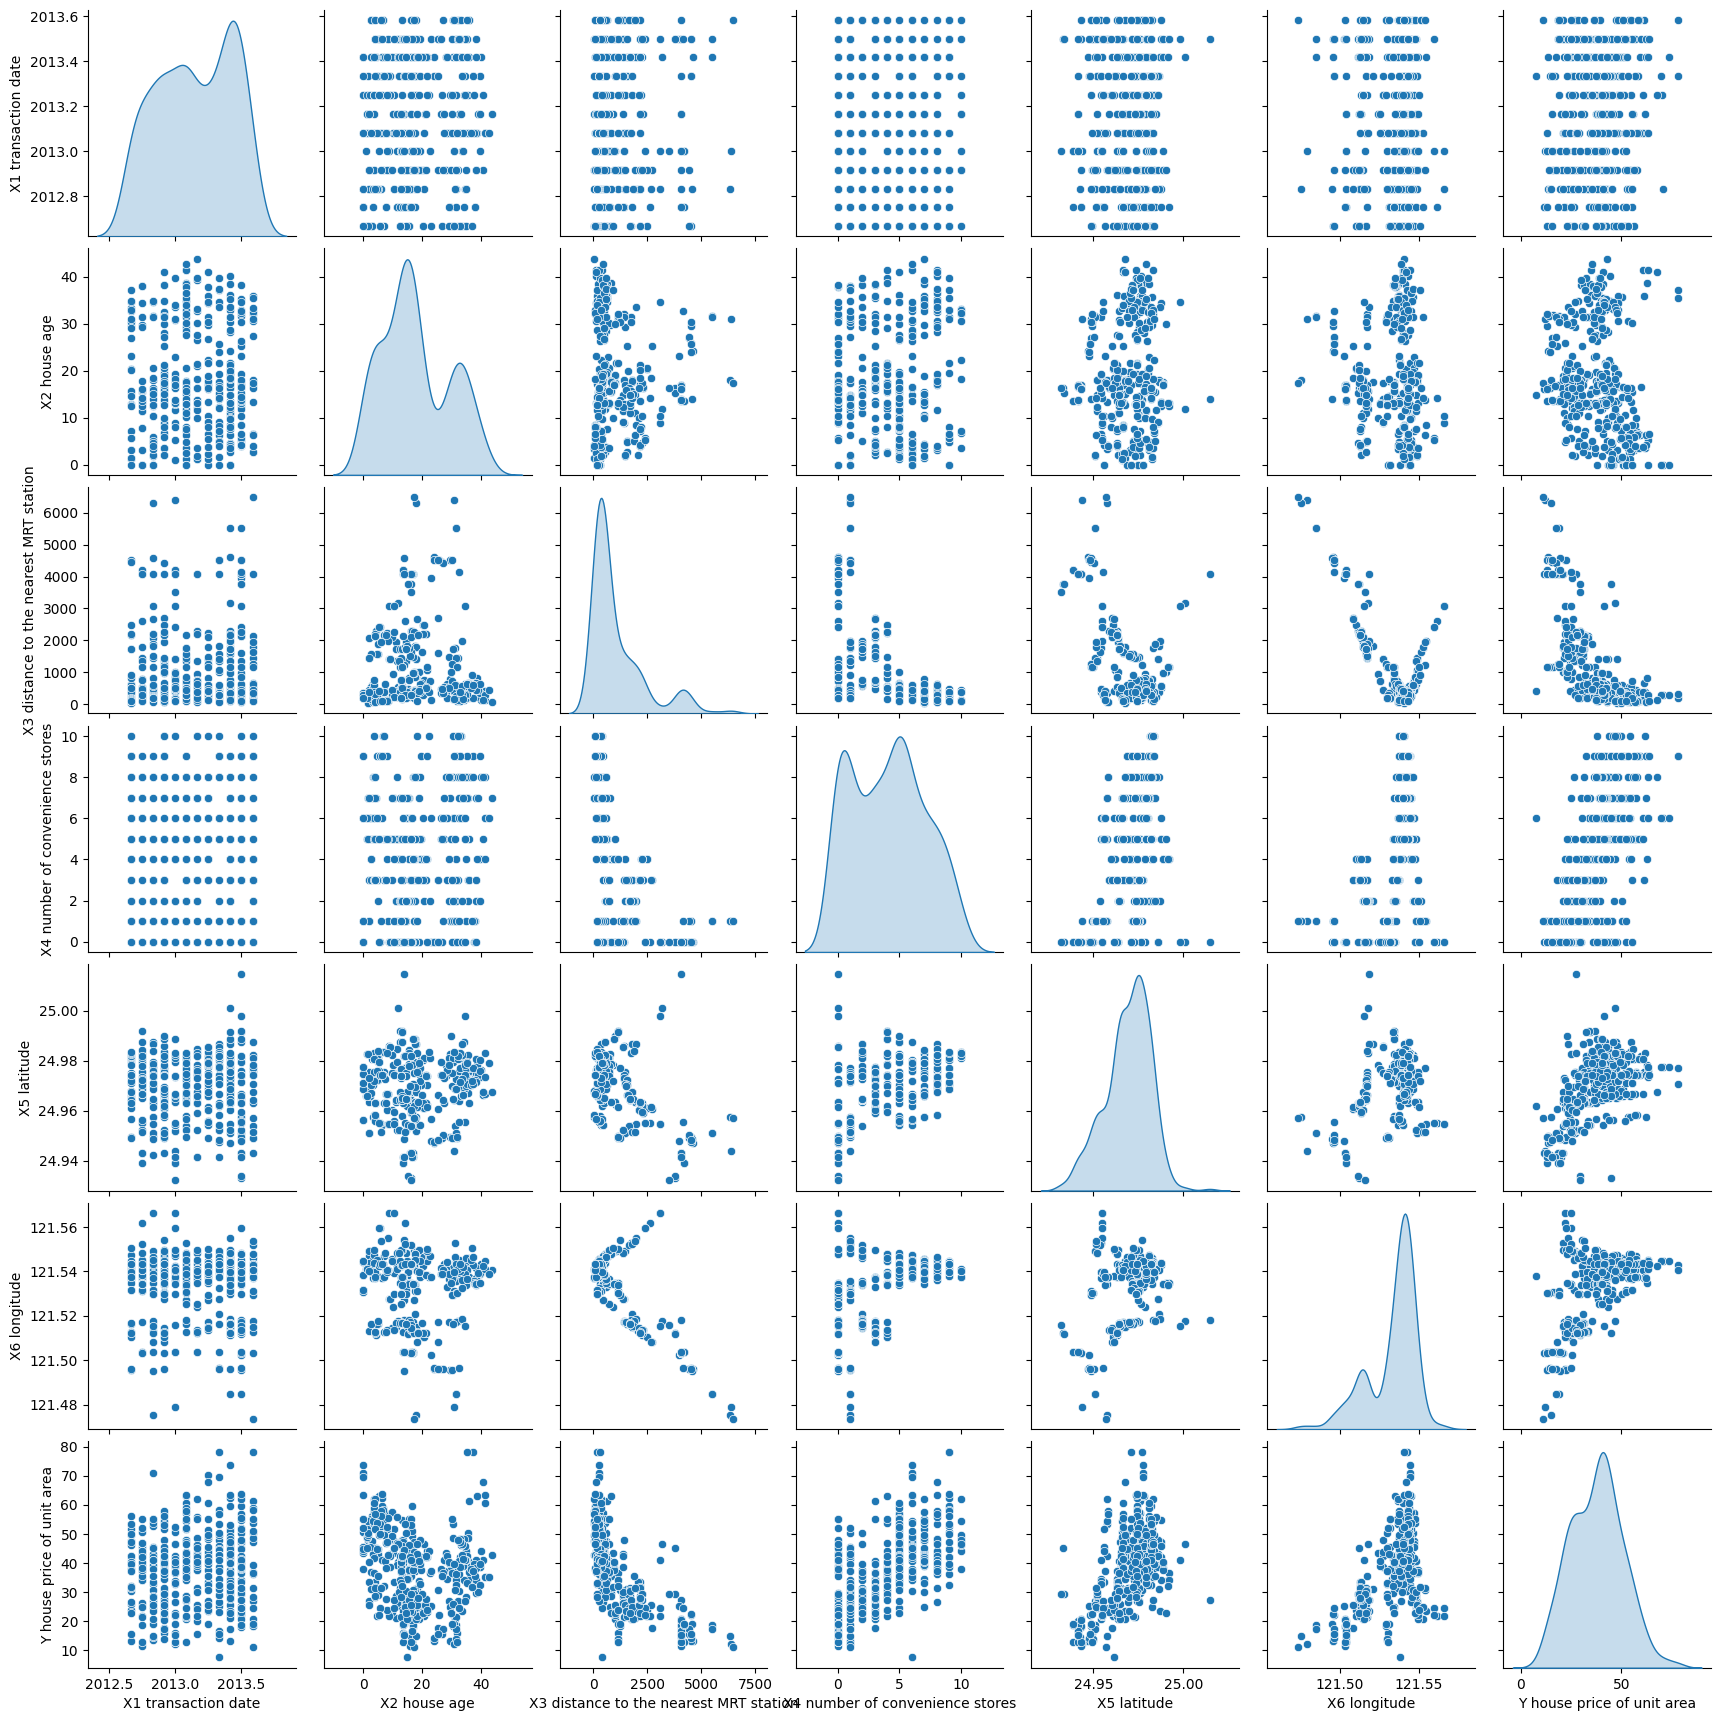

In [824]:
sns.pairplot(data=estate_data , diag_kind="kde")

In [825]:
#model = DecisionTreeRegressor()

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [826]:
MAE = mean_absolute_error(y_test,y_pred)

print(f"Mean Absolute error for this model is {MAE}\n")
MSE = mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error for this model is {MSE}\n")
RMSE = np.sqrt(MSE) # RMSE = MSE**0.5 or RMSE = sqrt(MSE)

print(f"Root Mean Squared Error for this model is {RMSE}\n")
tolerance = RMSE / y.mean()

print(f"Tolerance for this model based on prediction value = {tolerance}\n")

model_score = r2_score(y_test,y_pred)

print(f"R2_score for our model is {model_score}")

Mean Absolute error for this model is 6.127623528289631

Mean Squared Error for this model is 71.43289609028413

Root Mean Squared Error for this model is 8.451798393849923

Tolerance for this model based on prediction value = 0.22366561815805275

R2_score for our model is 0.5715568785860721


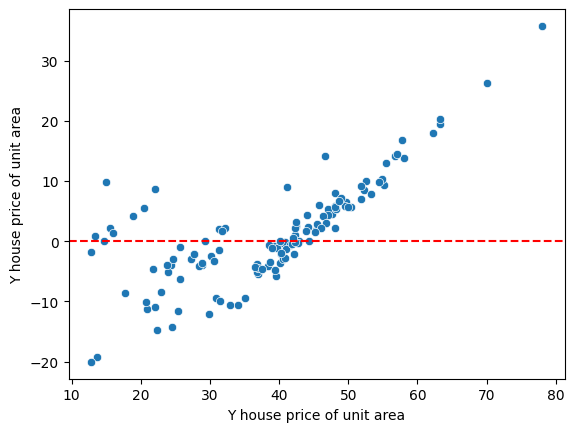

In [827]:
residual_error = y_test - y_pred

sns.scatterplot(x = y_test , y = residual_error)

plt.axhline(y=0 , color = "red" , linestyle = "--")

In [828]:
model.coef_

array([-5.55465670e-03,  2.12673116e+02,  1.59115076e+01])

In [829]:
final_model = LinearRegression()

In [830]:
final_model.fit(X,y)

LinearRegression()

In [831]:
final_model.coef_

array([-5.61711481e-03,  2.49593958e+02,  1.03249858e+01])

In [832]:
yhat = final_model.predict(X)
yhat

array([46.9666299 , 45.05476106, 45.44274615, 45.44274615, 44.37132047,
       29.96560106, 42.9908246 , 45.21001016,  7.91247051, 33.25389173,
       42.73130822, 44.80584363, 40.19859127, 27.79753872, 42.97808295,
       44.10659363, 44.45966161, 43.49725126, 41.55591334, 43.51130957,
       29.41096061, 44.00676613, 32.16536838, 44.00676613, 42.37025518,
       36.96168011, 44.79346238, 39.12758091, 42.09461744, 43.14337756,
       12.9317645 , 43.01554386, 42.2712262 , 44.51128751, 46.61445437,
       32.19053405, 31.53706065, 32.16536838, 41.53095056, 45.61457206,
       13.79744015, 14.23449767, 39.52365593, 45.71479299, 42.3942786 ,
       41.5438868 , 41.71723352, 41.97787909, 12.09300854, 13.22662957,
       42.30421387, 30.46788289, 36.93401951, 40.19859127, 45.61457206,
       32.50772337, 42.75590574, 40.71923474, 13.22662957, 39.20049053,
       31.50734444, 44.25605403, 29.95585149, 42.3942786 , 36.96771961,
       45.12500917, 42.0522412 , 42.80570748, 43.97955455, 45.44